In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the dataset
df = pd.read_csv('/EDA+Dataset.csv')

In [ ]:
df.head()

,Services and Goods,Manufacturer,Date,Invoice #,Provider,Goods / Services,Qty,Cost,Discount,GST(in%),...,Plan SubCategory,Client,GST Reg No,Patient,Species,Breed,DOB,Gender,Weight,Month
0,IV FLUIDS S,NaN,30-04-2021,21206,Dr Richard T,Service,0.5,100.0,0.0,NaN,...,Treatment,Ar,NaN,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
1,Inj Butorphanol,NaN,30-04-2021,21206,Dr Richard T,Service,1.0,100.0,0.0,NaN,...,OPD,Ar,NaN,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
2,Inj Tribivet,NaN,30-04-2021,21206,Dr Richard T,Service,1.0,100.0,0.0,NaN,...,OPD,Ar,NaN,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
3,Rescue Consultation,NaN,30-04-2021,21206,Dr Richard T,Service,1.0,400.0,400.0,NaN,...,OPD,Ar,NaN,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
4,Prescription Rx,NaN,30-04-2021,21204,Dr Martin Krishna,Service,1.0,0.0,0.0,NaN,...,OPD,Ko,NaN,Spring,Canine,Indi,"Mar, 13 2021",Female,2.4,Apr-21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65531 entries, 0 to 65530
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Services and Goods  65531 non-null  object 
 1   Manufacturer        7493 non-null   object 
 2   Date                65531 non-null  object 
 3   Invoice #           65531 non-null  object 
 4   Provider            65521 non-null  object 
 5   Goods / Services    65531 non-null  object 
 6   Qty                 65531 non-null  float64
 7   Cost                65531 non-null  float64
 8   Discount            65531 non-null  float64
 9   GST(in%)            18544 non-null  float64
 10  Tax                 65531 non-null  float64
 11  Sales               65531 non-null  float64
 12  Return Total        65531 non-null  float64
 13  Plan Category       65531 non-null  object 
 14  Plan SubCategory    65531 non-null  object 
 15  Client              65492 non-null  object 
 16  GST 

In [ ]:
missing_value= df.isnull().sum()

In [ ]:
pip install klib

In [ ]:
import klib

GridSpec(6, 6)

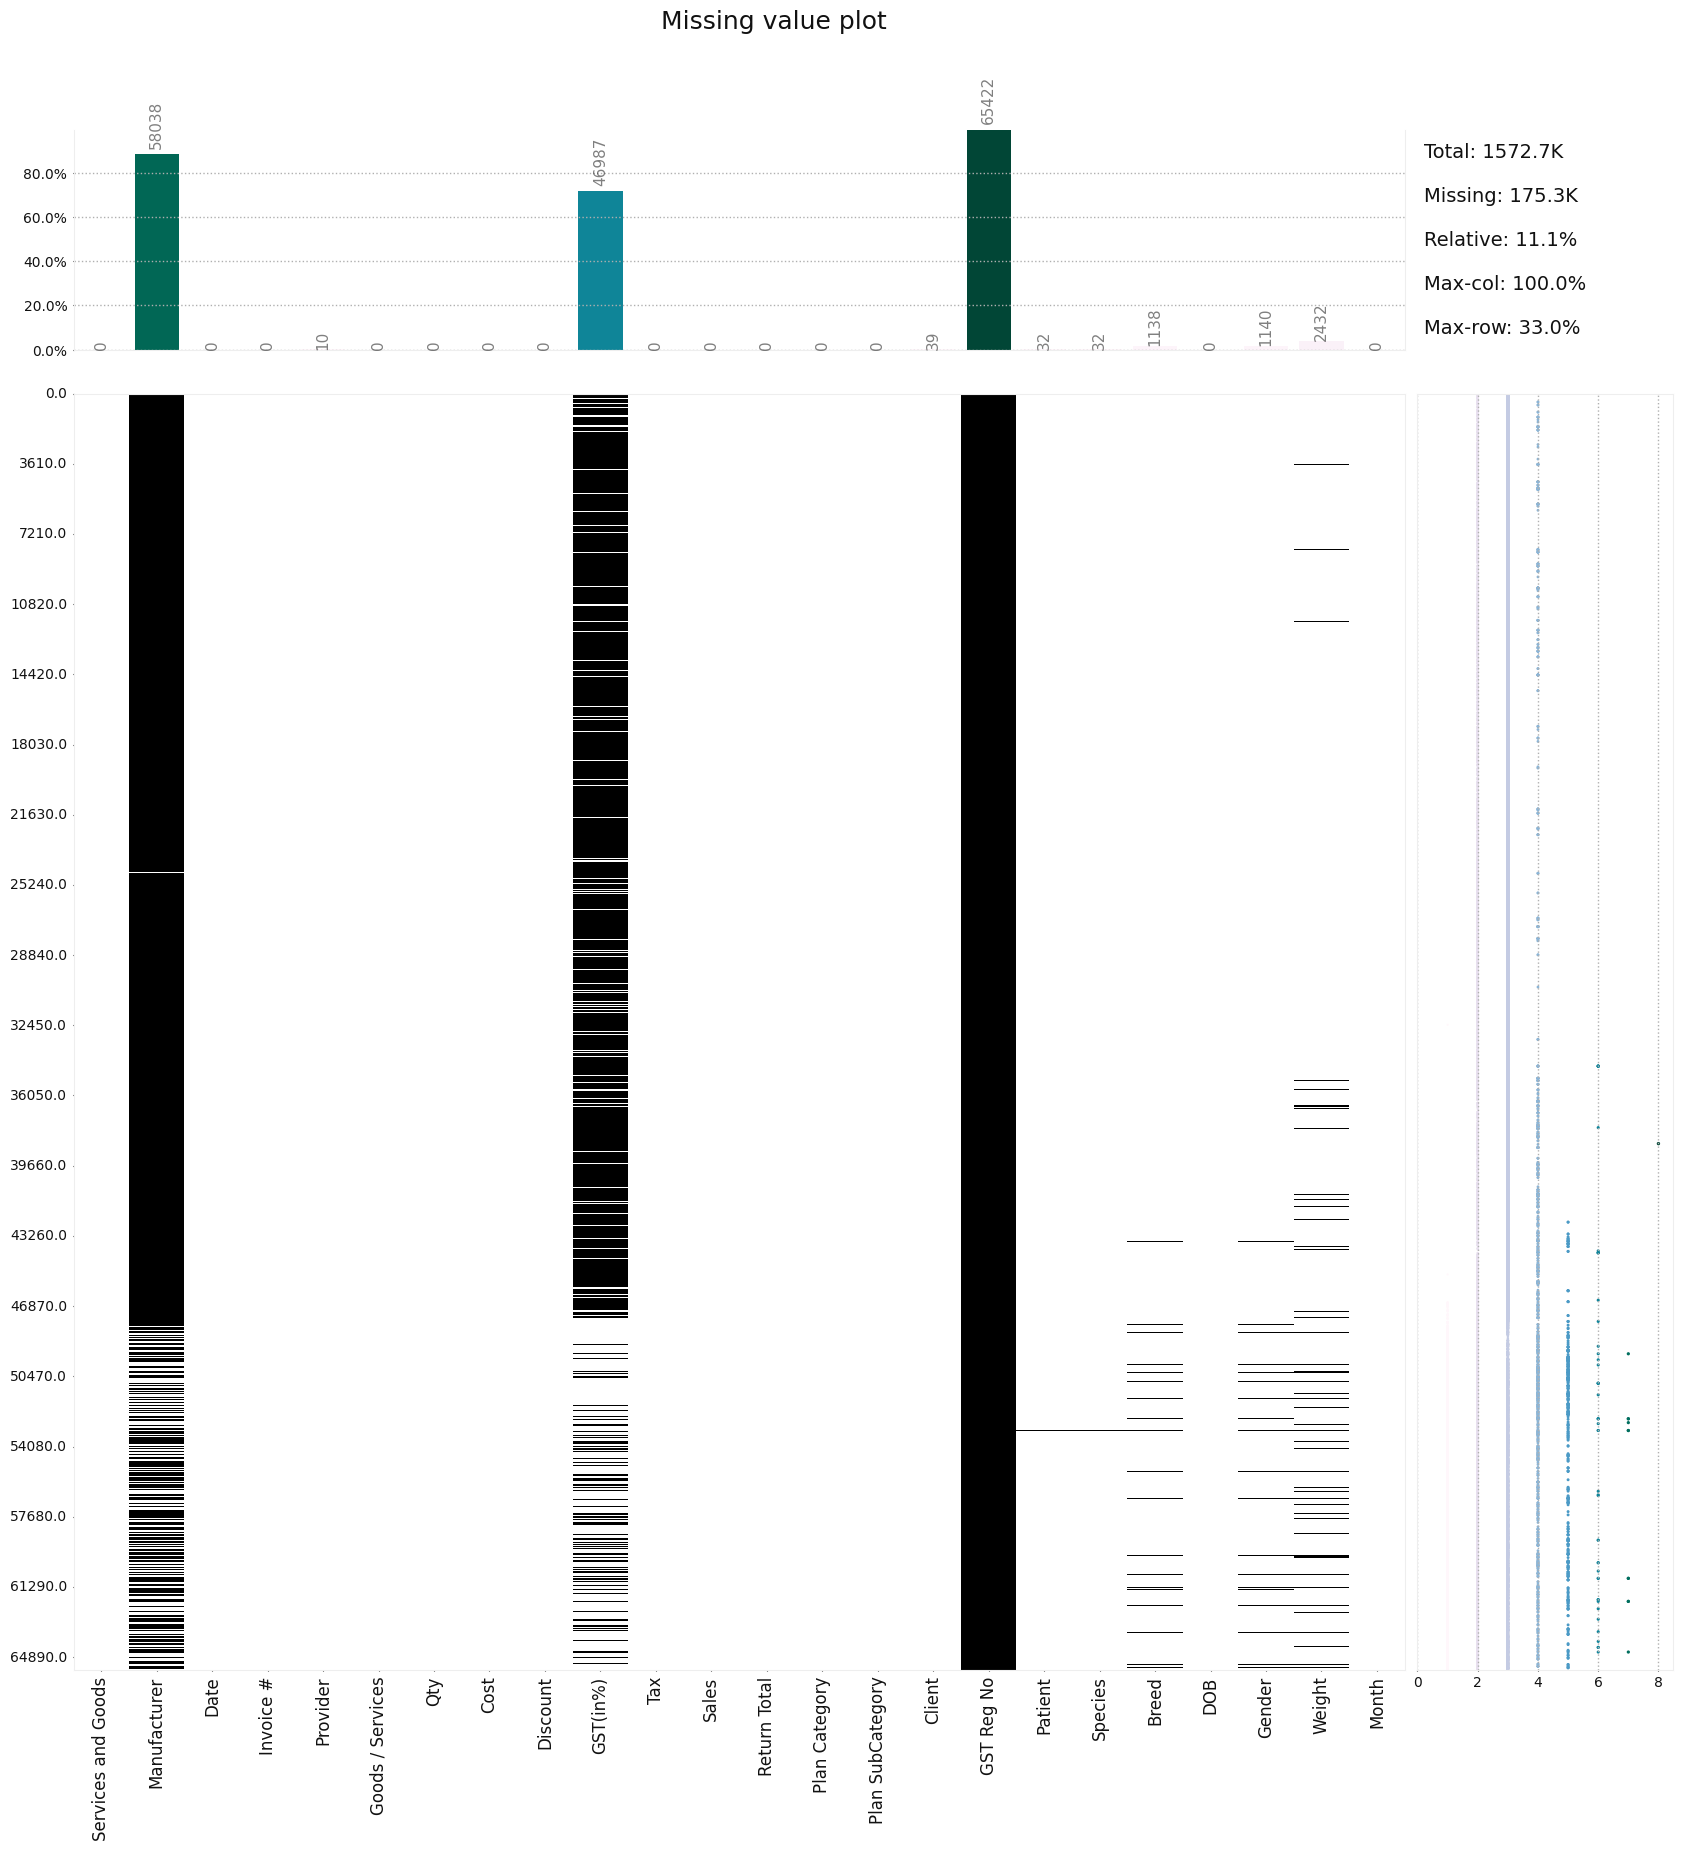

In [ ]:
klib.missingval_plot(df)

In [ ]:
total_values = df.shape[0]  # Total number of rows
percentage_missing = (missing_value/ total_values) * 100
percentage_missing

Services and Goods     0.000000
Manufacturer          88.565717
Date                   0.000000
Invoice #              0.000000
Provider               0.015260
Goods / Services       0.000000
Qty                    0.000000
Cost                   0.000000
Discount               0.000000
GST(in%)              71.701943
Tax                    0.000000
Sales                  0.000000
Return Total           0.000000
Plan Category          0.000000
Plan SubCategory       0.000000
Client                 0.059514
GST Reg No            99.833667
Patient                0.048832
Species                0.048832
Breed                  1.736583
DOB                    0.000000
Gender                 1.739635
Weight                 3.711221
Month                  0.000000
dtype: float64

In [ ]:
# delete the column  missing values more than 40%
# Filter columns where missing value percentage is <= 40%
threshold = 40
columns_to_keep = percentage_missing[percentage_missing <= threshold].index

# Create a new DataFrame with columns that meet the threshold
df1= df[columns_to_keep]
df1


,Services and Goods,Date,Invoice #,Provider,Goods / Services,Qty,Cost,Discount,Tax,Sales,...,Plan Category,Plan SubCategory,Client,Patient,Species,Breed,DOB,Gender,Weight,Month
0,IV FLUIDS S,30-04-2021,21206,Dr Richard T,Service,0.5,100.00,0.0,0.00,100.0,...,Treatment,Treatment,Ar,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
1,Inj Butorphanol,30-04-2021,21206,Dr Richard T,Service,1.0,100.00,0.0,0.00,100.0,...,Services,OPD,Ar,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
2,Inj Tribivet,30-04-2021,21206,Dr Richard T,Service,1.0,100.00,0.0,0.00,100.0,...,Services,OPD,Ar,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
3,Rescue Consultation,30-04-2021,21206,Dr Richard T,Service,1.0,400.00,400.0,0.00,0.0,...,Services,OPD,Ar,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
4,Prescription Rx,30-04-2021,21204,Dr Martin Krishna,Service,1.0,0.00,0.0,0.00,0.0,...,Services,OPD,Ko,Spring,Canine,Indi,"Mar, 13 2021",Female,2.4,Apr-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65526,SYP VIUSID 30ML,24-01-2020,P1728,Dr.Harish L J,Goods,1.0,338.98,0.0,61.02,400.0,...,Drug And Medical Items 0%,Drug And Medical Items 0%,Pr,Potato,Feline,Indian Cat,"Sep, 09 2019",Female,2.0,Jan-20
65527,HILLS DIGESTIVE CARE i/d TURKEY WET FOOD 370G,24-01-2020,P1728,Dr.Harish L J,Goods,2.0,644.06,0.0,115.94,760.0,...,Food 18%,Food 18%,Pr,Potato,Feline,Indian Cat,"Sep, 09 2019",Female,2.0,Jan-20
65528,SMART HEART ADULT WET CANNED LAMB 400gm,24-01-2020,P1727,Pet supermarket Sandhiya,Goods,1.0,129.40,15.0,20.60,135.0,...,Food 18%,Food 18%,Da,Whisky,Canine,American Pit Bull Terrier,"Nov, 19 2019",Male,7.5,Jan-20
65529,TAB (KETOCONAZOLE) PETORAL-K 200MG,24-01-2020,P1726,Dr.Diana T S,Goods,20.0,357.14,0.0,42.86,400.0,...,Drug And Medical Items 12%,Drug And Medical Items 12%,Ba,mylo,Canine,Labrador,"Dec, 06 2012",Male,45.0,Jan-20


Filling other missing values

In [ ]:
# Filling missing values in categorical columns with mode
categorical_cols = df1.select_dtypes(include='object').columns
for col in categorical_cols:
    df1[col].fillna(df1[col].mode()[0], inplace=True)

# Filling missing values in numerical columns with median
numerical_cols = df1.select_dtypes(include=['int', 'float']).columns
for col in numerical_cols:
    df1[col].fillna(df1[col].median(), inplace=True)

<ipython-input-62-73ec08cb1e34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].fillna(df1[col].mode()[0], inplace=True)
<ipython-input-62-73ec08cb1e34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].fillna(df1[col].mode()[0], inplace=True)
<ipython-input-62-73ec08cb1e34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].fillna(df1[col].mode()[0], inplace=True)
<ipython-input-62-73ec08cb1e34>:4: SettingWith

In [ ]:
df1.isnull().sum()

Services and Goods    0
Date                  0
Invoice #             0
Provider              0
Goods / Services      0
Qty                   0
Cost                  0
Discount              0
Tax                   0
Sales                 0
Return Total          0
Plan Category         0
Plan SubCategory      0
Client                0
Patient               0
Species               0
Breed                 0
DOB                   0
Gender                0
Weight                0
Month                 0
dtype: int64

In [ ]:
df1.columns

Index(['Services and Goods', 'Date', 'Invoice #', 'Provider',
       'Goods / Services', 'Qty', 'Cost', 'Discount', 'Tax', 'Sales',
       'Return Total', 'Plan Category', 'Plan SubCategory', 'Client',
       'Patient', 'Species', 'Breed', 'DOB', 'Gender', 'Weight', 'Month'],
      dtype='object')

In [ ]:
new_column_names = ['Services_and_Goods', 'Date', 'Invoice', 'Provider',
       'Goods_Services', 'Qty', 'Cost', 'Discount', 'Tax', 'Sales',
       'Return_Total', 'Plan_Category', 'Plan_SubCategory', 'Client',
       'Patient', 'Species', 'Breed', 'DOB', 'Gender', 'Weight', 'Month']
df1.columns = new_column_names

In [ ]:
df1.head()

,Services_and_Goods,Date,Invoice,Provider,Goods_Services,Qty,Cost,Discount,Tax,Sales,...,Plan_Category,Plan_SubCategory,Client,Patient,Species,Breed,DOB,Gender,Weight,Month
0,IV FLUIDS S,30-04-2021,21206,Dr Richard T,Service,0.5,100.0,0.0,0.0,100.0,...,Treatment,Treatment,Ar,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
1,Inj Butorphanol,30-04-2021,21206,Dr Richard T,Service,1.0,100.0,0.0,0.0,100.0,...,Services,OPD,Ar,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
2,Inj Tribivet,30-04-2021,21206,Dr Richard T,Service,1.0,100.0,0.0,0.0,100.0,...,Services,OPD,Ar,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
3,Rescue Consultation,30-04-2021,21206,Dr Richard T,Service,1.0,400.0,400.0,0.0,0.0,...,Services,OPD,Ar,Rosy,Canine,Mongrel,"Jan, 28 2021",Female,3.3,Apr-21
4,Prescription Rx,30-04-2021,21204,Dr Martin Krishna,Service,1.0,0.0,0.0,0.0,0.0,...,Services,OPD,Ko,Spring,Canine,Indi,"Mar, 13 2021",Female,2.4,Apr-21


In [ ]:
categorical_cols = df1.select_dtypes(include='object').columns
categorical_cols

Index(['Services_and_Goods', 'Date', 'Invoice', 'Provider', 'Goods_Services',
       'Plan_Category', 'Plan_SubCategory', 'Client', 'Patient', 'Species',
       'Breed', 'DOB', 'Gender', 'Month'],
      dtype='object')

Multicollinearity generally affects numeric variables in a regression context. To check multicollinearity among numeric variables:

In [ ]:
numerical_cols = df1.select_dtypes(include=['int', 'float']).columns
numerical_cols

Index(['Qty', 'Cost', 'Discount', 'Tax', 'Sales', 'Return_Total', 'Weight'], dtype='object')

In [ ]:
# Create a DataFrame with only numeric variables
numeric_df = df1[['Qty', 'Cost', 'Discount', 'Tax', 'Sales', 'Return_Total', 'Weight']]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


       Variable       VIF
0           Qty  1.385087
1          Cost       inf
2      Discount       inf
3           Tax       inf
4         Sales       inf
5  Return_Total  2.692945
6        Weight  1.163823


Insight:there is no VIF greater than 5 of any numeric variable , so numeric variable not gonna delete

In [ ]:
!pip install pingouin


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=a4cd4792a849e7b5a5a645b89df708102d72afc6e07b256a770083b3d0a6df62
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
categorical_cols = df1.select_dtypes(include='object').columns
categorical_cols

Index(['Services_and_Goods', 'Date', 'Invoice', 'Provider', 'Goods_Services',
       'Plan_Category', 'Plan_SubCategory', 'Client', 'Patient', 'Species',
       'Breed', 'DOB', 'Gender', 'Month'],
      dtype='object')

In [ ]:
import pingouin as pg

# Store variables with low Eta correlation
low_correlation_vars = []

# Calculate Eta correlation ratio for each categorical variable
for cat_var in categorical_cols:
    result = pg.anova(dv='Sales', between=cat_var, data=df1, detailed=True)
    print(f"Results for {cat_var}:\n{result}")

Results for Services_and_Goods:
               Source            SS     DF            MS          F  p-unc  \
0  Services_and_Goods  1.477580e+10   1923  7.683724e+06  16.846805    0.0   
1              Within  2.901076e+10  63607  4.560938e+05        NaN    NaN   

        np2  
0  0.337451  
1       NaN  
Results for Date:
   Source            SS     DF            MS         F         p-unc       np2
0    Date  5.067132e+08    462  1.096782e+06  1.648929  6.658146e-17  0.011572
1  Within  4.327985e+10  65068  6.651480e+05       NaN           NaN       NaN
Results for Invoice:
    Source            SS     DF            MS         F  p-unc       np2
0  Invoice  3.170597e+10  20918  1.515726e+06  5.597373    0.0  0.724103
1   Within  1.208059e+10  44612  2.707925e+05       NaN    NaN       NaN
Results for Provider:
     Source            SS     DF            MS          F          p-unc  \
0  Provider  5.290005e+08     63  8.396833e+06  12.707963  1.953720e-127   
1    Within  4.325756e

In [ ]:
import pingouin as pg

eta_squared_values = {}

for cat_var in categorical_cols:
    result = pg.anova(dv='Sales', between=cat_var, data=df1, detailed=True)

    # Extract necessary components for Eta-squared calculation
    ss_between = result['SS'][0]  # Sum of squares between groups
    ss_total = result[result['Source'] == 'Within']['SS'].values[0]  # Total sum of squares

    eta_squared = ss_between / (ss_between + ss_total)  # Calculate Eta-squared
    eta_squared_values[cat_var] = eta_squared

print("Eta-squared values for categorical variables:")
for cat_var, eta_squared in eta_squared_values.items():
    print(f"{cat_var}: {eta_squared}")


Eta-squared values for categorical variables:
Services_and_Goods: 0.33745059497241114
Date: 0.011572345136267904
Invoice: 0.7241026871340264
Provider: 0.012081343469749485
Goods_Services: 0.0016869622019567915
Plan_Category: 0.04309144203462991
Plan_SubCategory: 0.15988155118641373
Client: 0.008329825174654765
Patient: 0.034804755230577133
Species: 0.0010534057087851635
Breed: 0.009413550488146788
DOB: 0.04362930849914929
Gender: 0.00023754095861125684
Month: 0.0018478525578364672


In [ ]:
threshold = 0.1  # Set your threshold here

significant_relationship_vars = {}

for cat_var, eta_squared in eta_squared_values.items():
    if eta_squared >= threshold:
        significant_relationship_vars[cat_var] = eta_squared

print("Categorical variables with a significant relationship with Sales:")
for cat_var, eta_squared in significant_relationship_vars.items():
    print(f"{cat_var}: {eta_squared}")

Categorical variables with a significant relationship with Sales:
Services_and_Goods: 0.33745059497241114
Invoice: 0.7241026871340264
Plan_SubCategory: 0.15988155118641373


Creating a new data frame with this 3 catagorical variable and remaining numerical variable

In [ ]:
df2 = df1[['Services_and_Goods','Invoice','Plan_SubCategory','Qty', 'Cost', 'Discount', 'Tax', 'Sales', 'Return_Total', 'Weight']]
df2

,Services_and_Goods,Invoice,Plan_SubCategory,Qty,Cost,Discount,Tax,Sales,Return_Total,Weight
0,IV FLUIDS S,21206,Treatment,0.5,100.00,0.0,0.00,100.0,0.0,3.3
1,Inj Butorphanol,21206,OPD,1.0,100.00,0.0,0.00,100.0,0.0,3.3
2,Inj Tribivet,21206,OPD,1.0,100.00,0.0,0.00,100.0,0.0,3.3
3,Rescue Consultation,21206,OPD,1.0,400.00,400.0,0.00,0.0,0.0,3.3
4,Prescription Rx,21204,OPD,1.0,0.00,0.0,0.00,0.0,0.0,2.4
...,...,...,...,...,...,...,...,...,...,...
65526,SYP VIUSID 30ML,P1728,Drug And Medical Items 0%,1.0,338.98,0.0,61.02,400.0,0.0,2.0
65527,HILLS DIGESTIVE CARE i/d TURKEY WET FOOD 370G,P1728,Food 18%,2.0,644.06,0.0,115.94,760.0,0.0,2.0
65528,SMART HEART ADULT WET CANNED LAMB 400gm,P1727,Food 18%,1.0,129.40,15.0,20.60,135.0,0.0,7.5
65529,TAB (KETOCONAZOLE) PETORAL-K 200MG,P1726,Drug And Medical Items 12%,20.0,357.14,0.0,42.86,400.0,0.0,45.0


In [ ]:
X = df2[['Services_and_Goods','Invoice','Plan_SubCategory','Qty', 'Cost', 'Discount', 'Tax','Return_Total', 'Weight']]
y = df2['Sales']

In [ ]:
# Identify and remove outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
outliers

<ipython-input-93-1367fa908ca4>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = X.quantile(0.25)
<ipython-input-93-1367fa908ca4>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = X.quantile(0.75)
<ipython-input-93-1367fa908ca4>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)


1        False
2        False
4        False
5        False
6        False
         ...  
65512     True
65515     True
65516    False
65521    False
65522    False
Length: 41546, dtype: bool

In [ ]:
#  remove outliers

X = X[~outliers]
y = y[~outliers]

Logarithomic transformation

In [ ]:
# apply log to all numeric variable
numerical_cols = df2.select_dtypes(include=[np.number]).columns.tolist()

# Apply natural logarithm transformation to numerical columns
df_log = df2.copy()  # Create a copy to avoid modifying the original DataFrame

# Applying log transformation to each numerical column
for col in numerical_cols:
    df_log[col] = np.log1p(df_log[col])

Corelation

<Axes: xlabel='Services_and_Goods'>

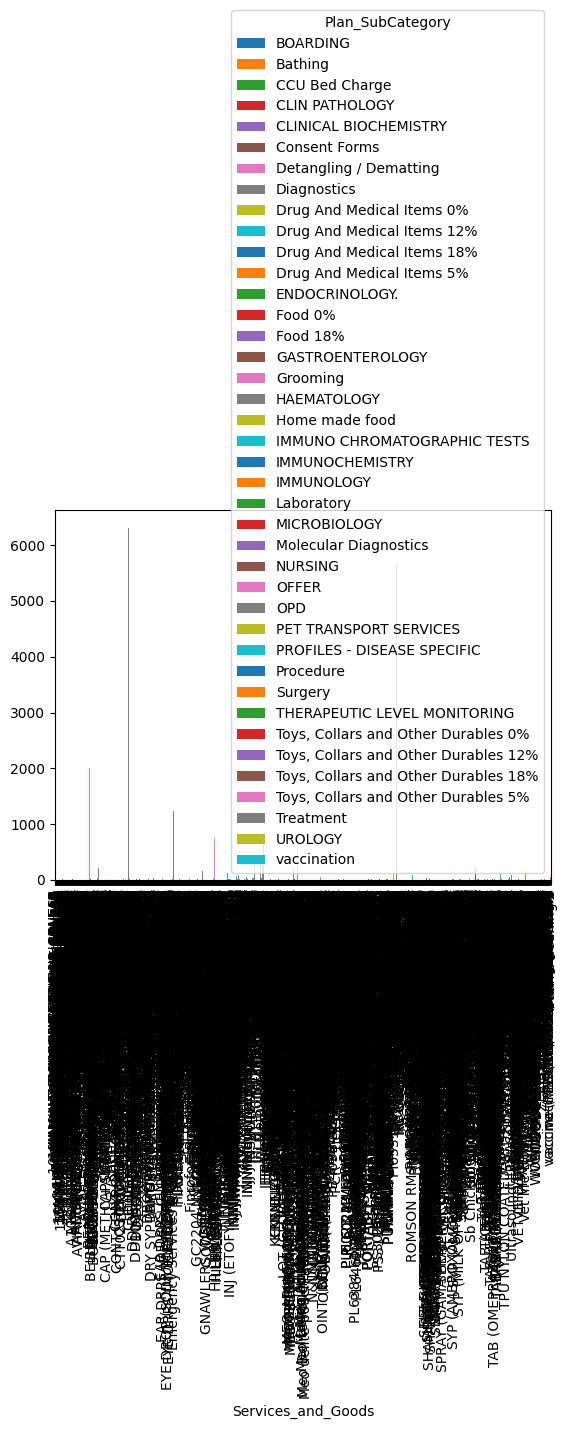

In [102]:

ct = pd.crosstab(df2['Services_and_Goods'], df2['Plan_SubCategory'])
ct.plot(kind='bar', stacked=True)



In [103]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(df2['Services_and_Goods'], df2['Plan_SubCategory'])
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 2544766.098938602
P-value: 0.0


Corealtion between two numerical variable

In [104]:
correlation = df2['Discount'].corr(df2['Sales'])
print(f"Pearson's Correlation Coefficient: {correlation}")

Pearson's Correlation Coefficient: 0.05543806754347462


Visualization

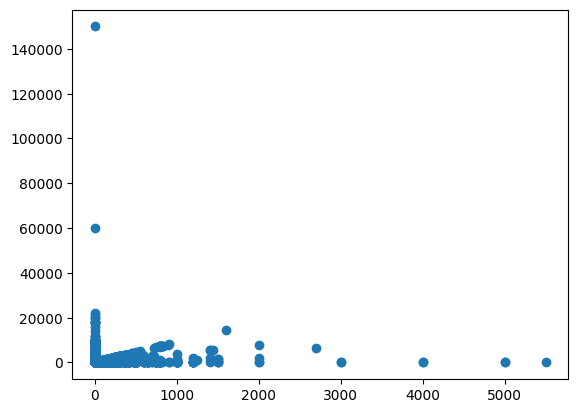

In [105]:
plt.scatter(df2['Discount'], df2['Sales'])
plt.show()